In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import config as cfg
import seaborn as sns
import ds_functions as ds
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

from data import get_hf_data, get_t_data
from strategies import *

# Heart Failure Dataset

In [2]:
hf_data_raw = get_hf_data()

## Data Balancing

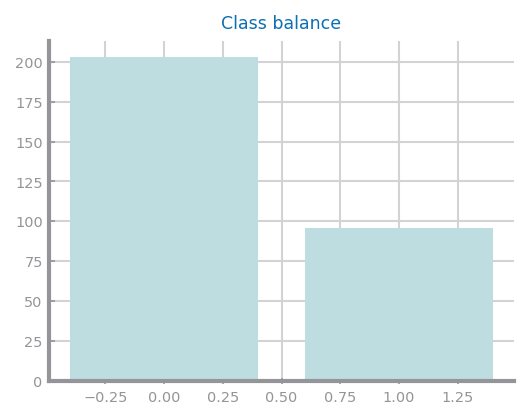

Minority class: 96
Majority class: 203
Proportion: 0.47 : 1


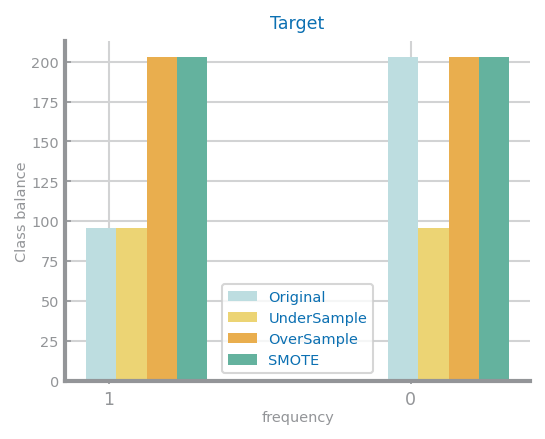

In [3]:
getBalancing(hf_data_raw, 'DEATH_EVENT')

## Try other approaches

In [2]:
hf_data_undersample = get_hf_data(filter_outliers=False, feature_selection=False, scaling="none", balancing="undersample")
hf_data_oversample = get_hf_data(filter_outliers=False, feature_selection=False, scaling="none", balancing="oversample")
hf_data_smote = get_hf_data(filter_outliers=False, feature_selection=False, scaling="none", balancing="smote")

### Random Forests

100%|██████████| 180/180 [00:35<00:00,  2.92it/s]

<Figure size 600x450 with 0 Axes>

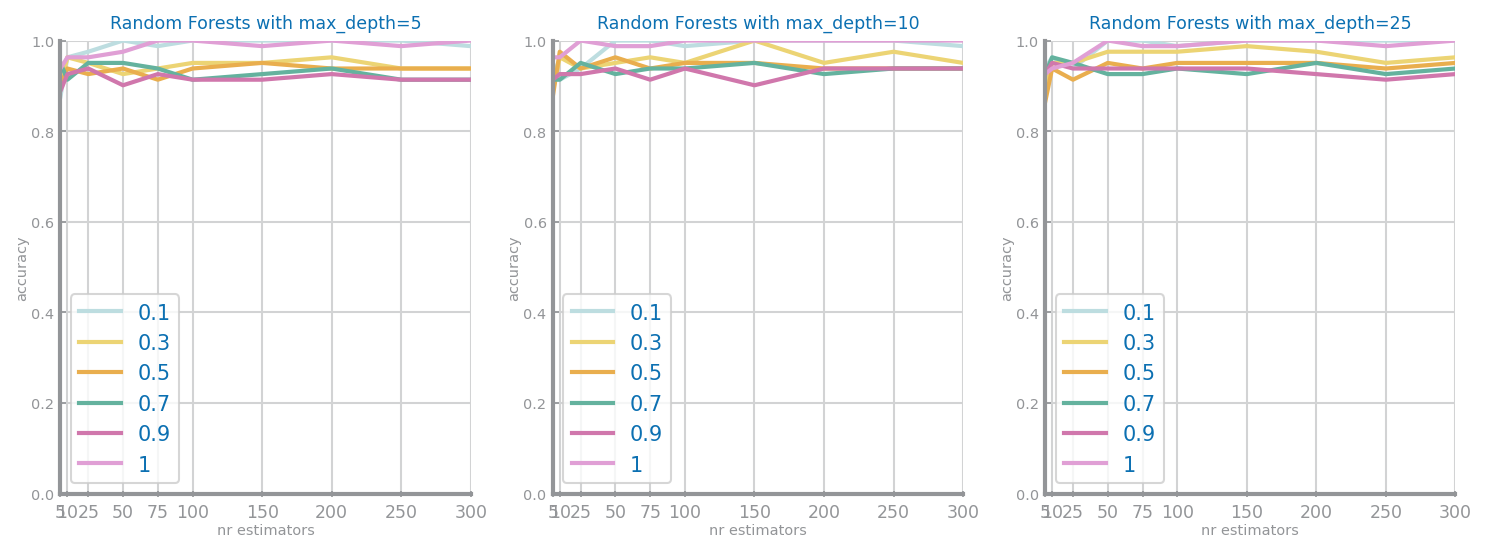

Best results with depth=5, 0.10 features and 50 estimators, with accuracy=1.0000


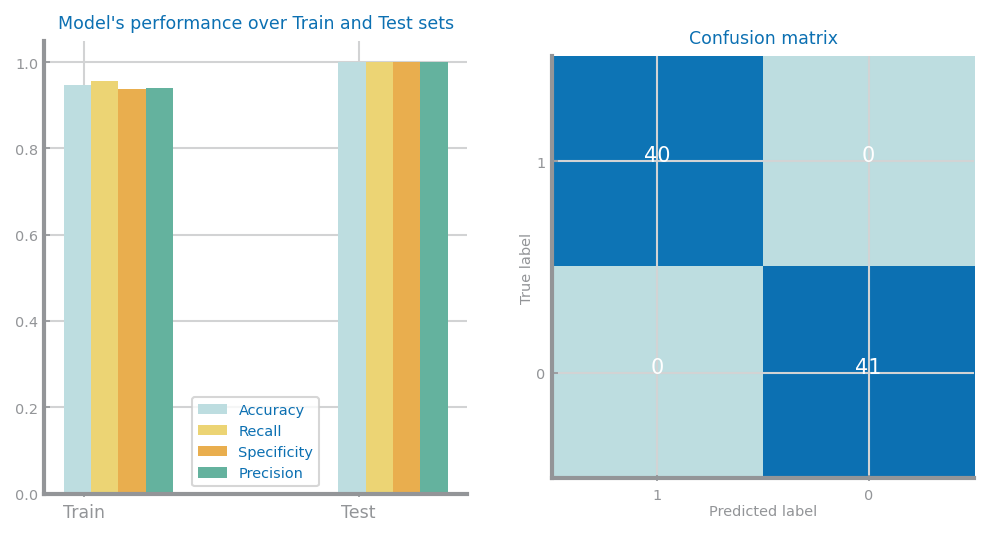

In [3]:
trnX, tstX, y, trnY, tstY, best_tree = randomForests(hf_data_smote, 'DEATH_EVENT')

## Gradient Boosting

### With undersample

100%|██████████| 150/150 [00:27<00:00,  5.37it/s]


<Figure size 600x450 with 0 Axes>

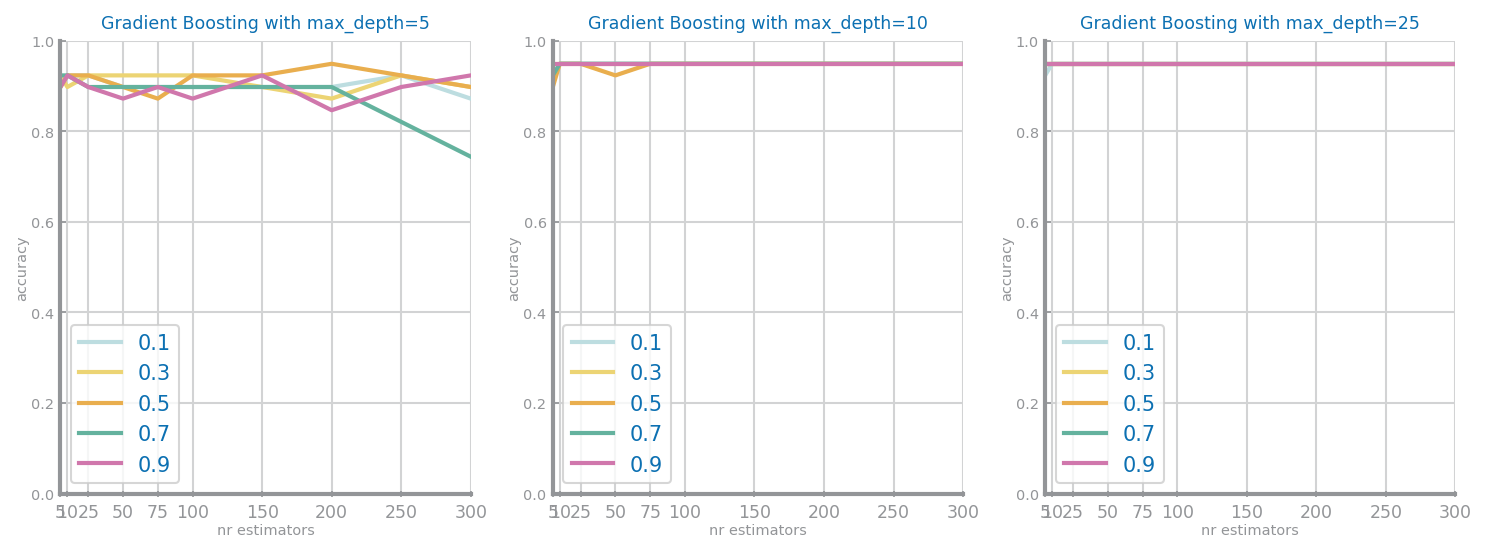

Best results with depth=5, learning rate=0.50 and 200 estimators, with accuracy=0.95


In [3]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(hf_data_undersample, 'DEATH_EVENT')

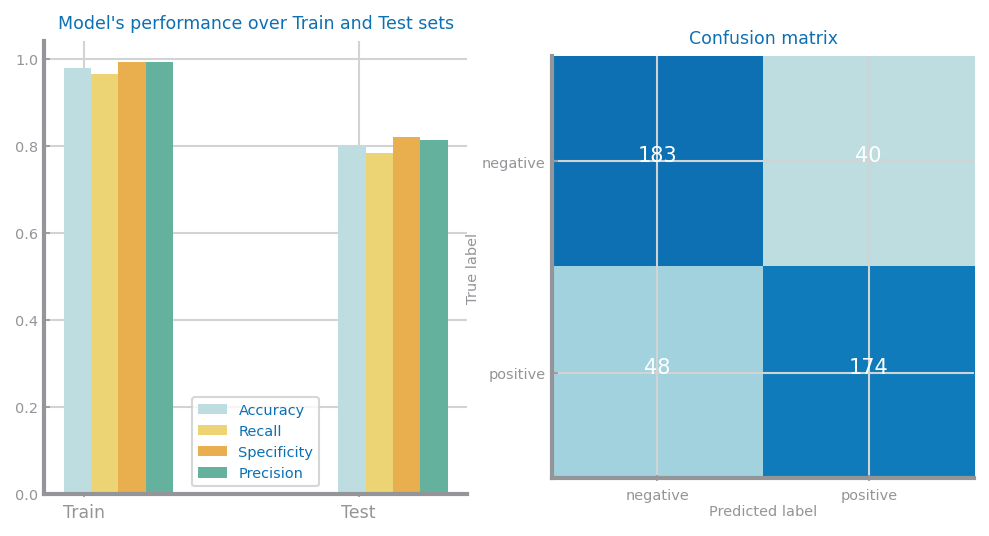

In [6]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### With oversample

100%|██████████| 150/150 [00:47<00:00,  3.14it/s]


<Figure size 600x450 with 0 Axes>

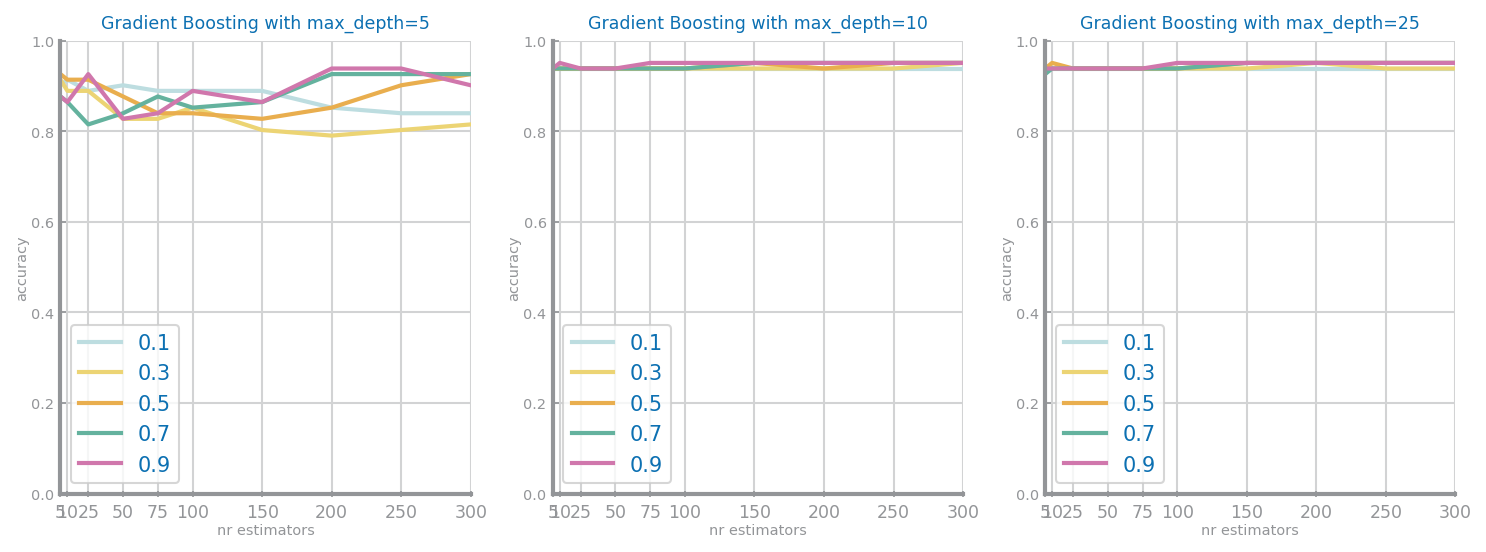

Best results with depth=10, learning rate=0.30 and 300 estimators, with accuracy=0.95


In [7]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(hf_data_oversample, 'DEATH_EVENT')

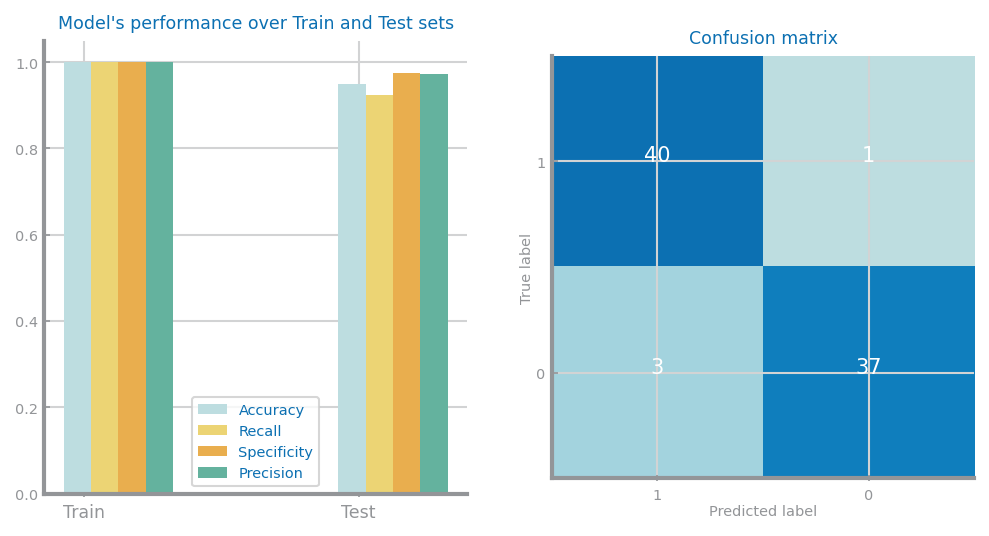

In [8]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### With smote

100%|██████████| 150/150 [00:54<00:00,  2.74it/s]


<Figure size 600x450 with 0 Axes>

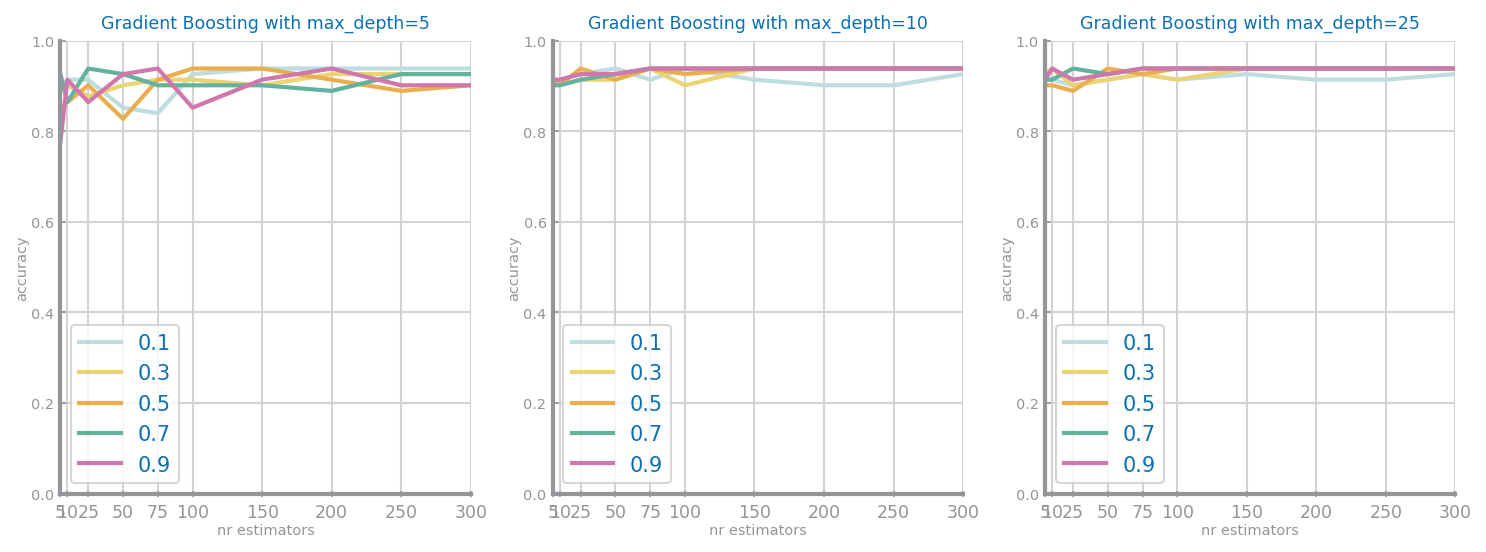

Best results with depth=5, learning rate=0.10 and 150 estimators, with accuracy=0.94


In [9]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(hf_data_smote, 'DEATH_EVENT')

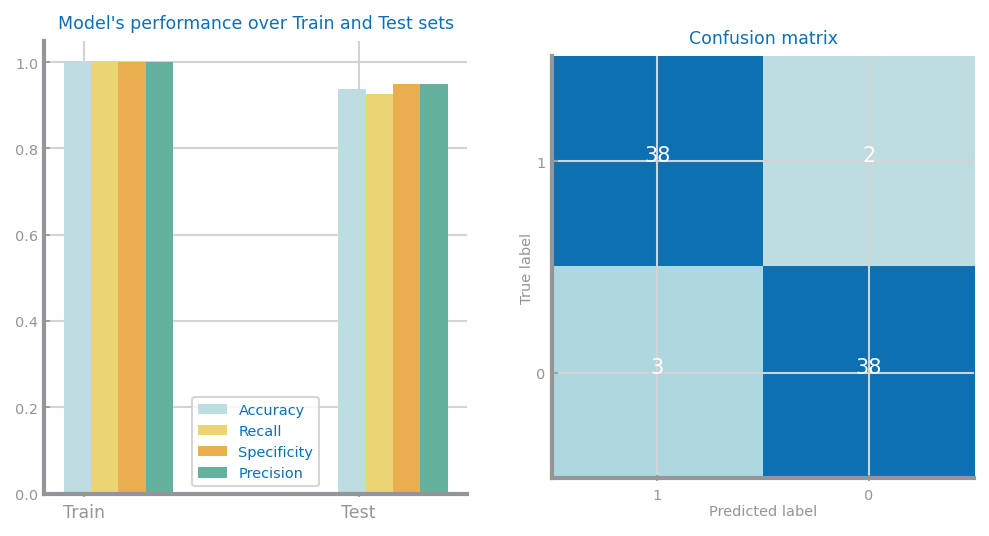

In [10]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

# Heart Failure Dataset

In [ ]:
t_data = get_t_data()

## Data Balancing

In [ ]:
getBalancing(t_data, 'toxic')

## Try other approaches

In [2]:
t_data_undersample = get_t_data(feature_selection=False, balancing="undersample")
t_data_oversample = get_t_data(feature_selection=False, balancing="oversample")
t_data_smote = get_t_data(feature_selection=False, balancing="smote")

### Random Forests

In [ ]:
trnX, tstX, y, trnY, tstY, best_tree = randomForests(t_data_smote, 'toxic', kfold=False, quick=True)

 75%|███████▌  | 18/24 [01:29<00:42,  7.15s/it]

## Gradient Boosting

100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


<Figure size 600x450 with 0 Axes>

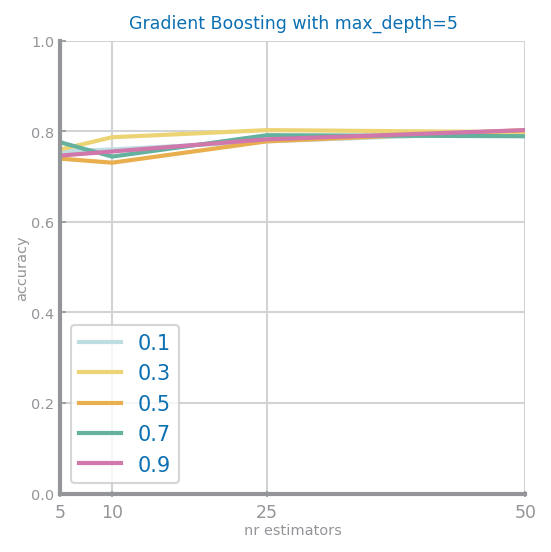

Best results with depth=5, learning rate=0.30 and 25 estimators, with accuracy=0.80


In [5]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(t_data_undersample, 'toxic', False, True)

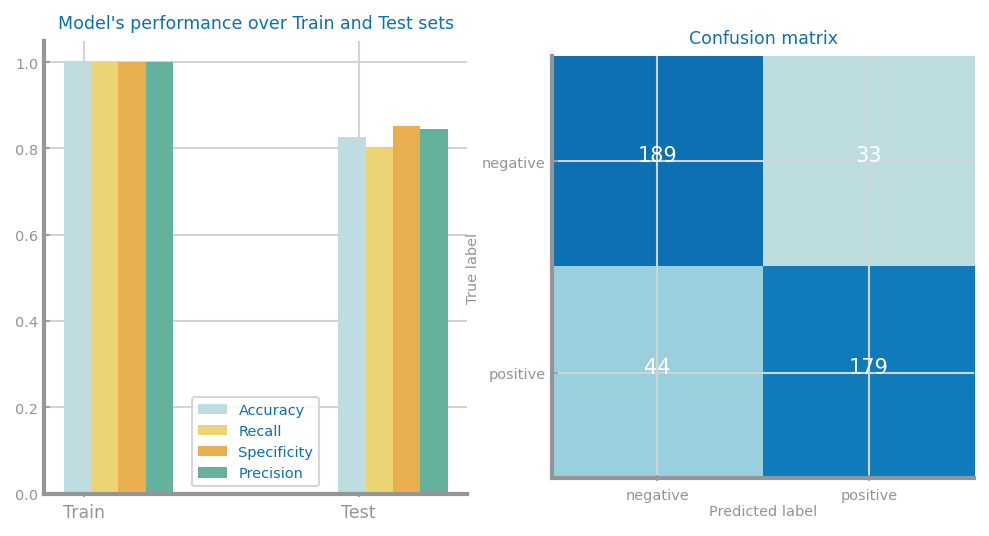

In [4]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

(5, 0.1, 5)
(5, 0.1, 10)
(5, 0.1, 25)
(5, 0.1, 50)
(5, 0.1, 75)
(5, 0.3, 5)
(5, 0.3, 10)
(5, 0.3, 25)
(5, 0.3, 50)
(5, 0.3, 75)
(5, 0.5, 5)
(5, 0.5, 10)
(5, 0.5, 25)
(5, 0.5, 50)
(5, 0.5, 75)
(5, 0.7, 5)
(5, 0.7, 10)
(5, 0.7, 25)
(5, 0.7, 50)
(5, 0.7, 75)
(5, 0.9, 5)
(5, 0.9, 10)
(5, 0.9, 25)
(5, 0.9, 50)
(5, 0.9, 75)


<Figure size 600x450 with 0 Axes>

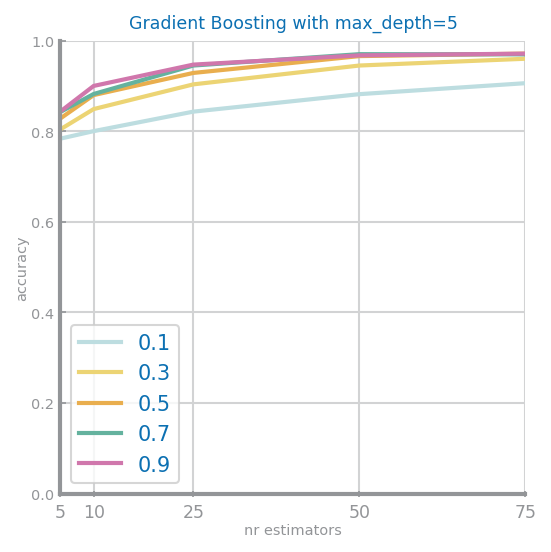

Best results with depth=5, learning rate=0.50 and 75 estimators, with accuracy=0.97


In [5]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(t_data_oversample, 'toxic', False, True)

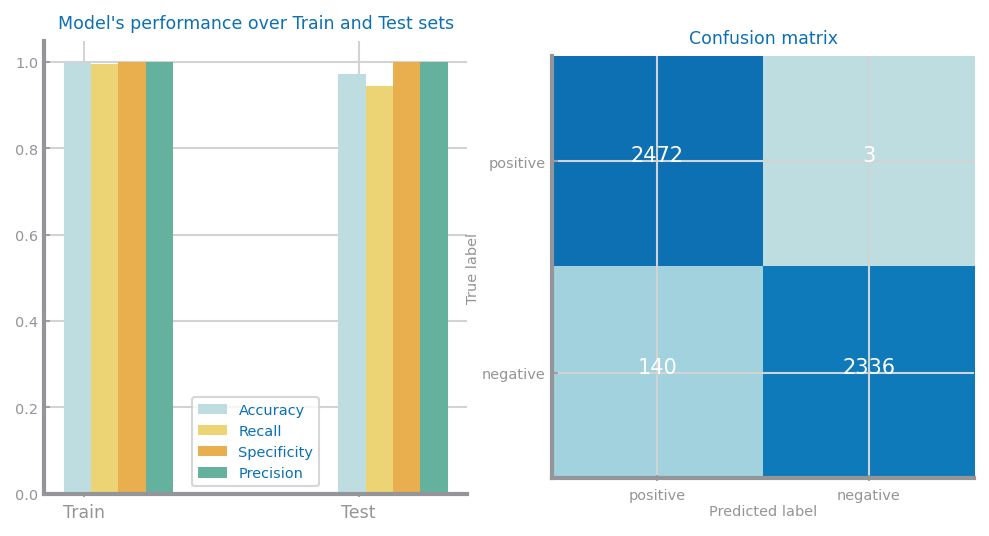

In [6]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

(5, 0.1, 5)
(5, 0.1, 10)
(5, 0.1, 25)
(5, 0.1, 50)
(5, 0.1, 75)
(5, 0.3, 5)
(5, 0.3, 10)
(5, 0.3, 25)
(5, 0.3, 50)
(5, 0.3, 75)
(5, 0.5, 5)
(5, 0.5, 10)
(5, 0.5, 25)
(5, 0.5, 50)
(5, 0.5, 75)
(5, 0.7, 5)
(5, 0.7, 10)
(5, 0.7, 25)
(5, 0.7, 50)
(5, 0.7, 75)
(5, 0.9, 5)
(5, 0.9, 10)
(5, 0.9, 25)
(5, 0.9, 50)
(5, 0.9, 75)


<Figure size 600x450 with 0 Axes>

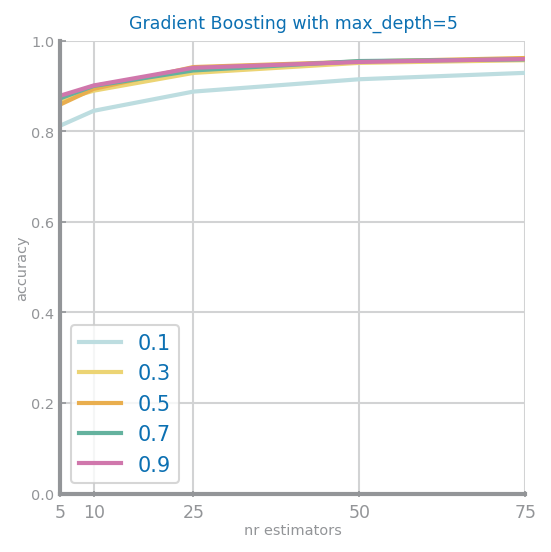

Best results with depth=5, learning rate=0.50 and 75 estimators, with accuracy=0.96


In [7]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(t_data_smote, 'toxic', False, True)

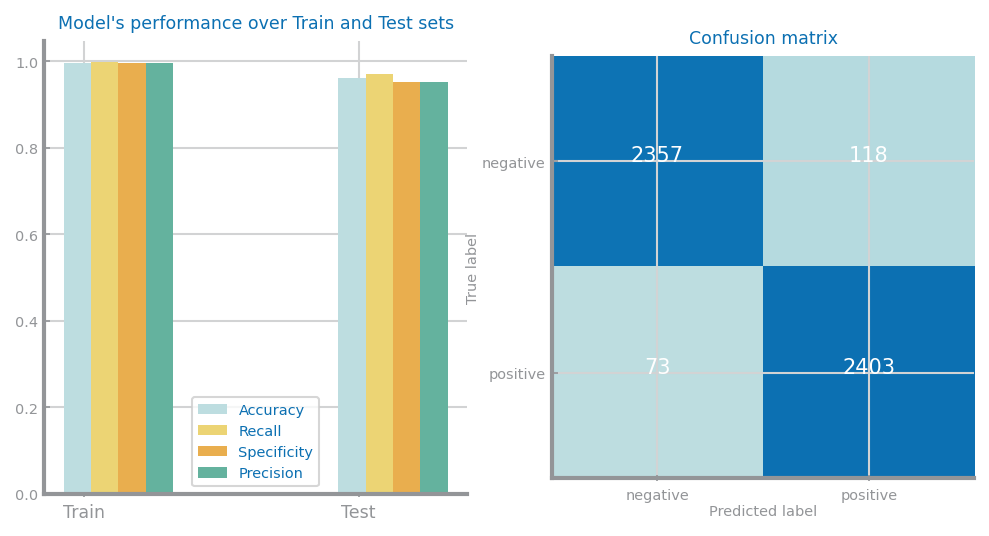

In [8]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)